In [124]:
import numpy as np
import pandas as pd

from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn import metrics

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Answer 1

In [125]:
ds = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheet_name=1)


In [126]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                       5000 non-null int64
Age (in years)           5000 non-null int64
Experience (in years)    5000 non-null int64
Income (in K/month)      5000 non-null int64
ZIP Code                 5000 non-null int64
Family members           4982 non-null float64
CCAvg                    5000 non-null float64
Education                5000 non-null int64
Mortgage                 5000 non-null int64
Personal Loan            5000 non-null int64
Securities Account       5000 non-null int64
CD Account               5000 non-null int64
Online                   5000 non-null int64
CreditCard               5000 non-null int64
dtypes: float64(2), int64(12)
memory usage: 547.0 KB


In [127]:
ds.columns[ds.isna().any()].tolist()

['Family members']

In [128]:
ds['Family members'].median()
ds = ds.fillna(ds['Family members'].median())# as only family number has nan we can replace is directly
ds.sample(3)

,ID,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
643,644,45,21,152,91902,2.0,1.4,1,0,0,0,0,1,0
1335,1336,50,24,180,94539,1.0,1.7,1,0,0,0,0,1,1
1795,1796,49,24,70,90024,1.0,2.9,1,0,0,0,0,0,1


In [129]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age (in years),5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience (in years),5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income (in K/month),5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family members,5000.0,2.395800,1.145340,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [130]:
positiveExperience = ds.loc[ds['Experience (in years)'] >0]
tempList = ds.loc[ds['Experience (in years)'] <0]['ID'].tolist()

for id in tempList:
    age = ds.loc[np.where(ds['ID']==id)]["Age (in years)"].tolist()[0]
    education = ds.loc[np.where(ds['ID']==id)]["Education"].tolist()[0]
    ds_filtered = positiveExperience[(positiveExperience['Age (in years)'] == age) & (positiveExperience.Education == education)]
    exp = ds_filtered['Experience (in years)'].median()
    ds.loc[ds.loc[np.where(ds['ID']==id)].index, 'Experience (in years)'] = exp


In [131]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age (in years),5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience (in years),4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income (in K/month),5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family members,5000.0,2.395800,1.145340,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


# Answer 2

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,

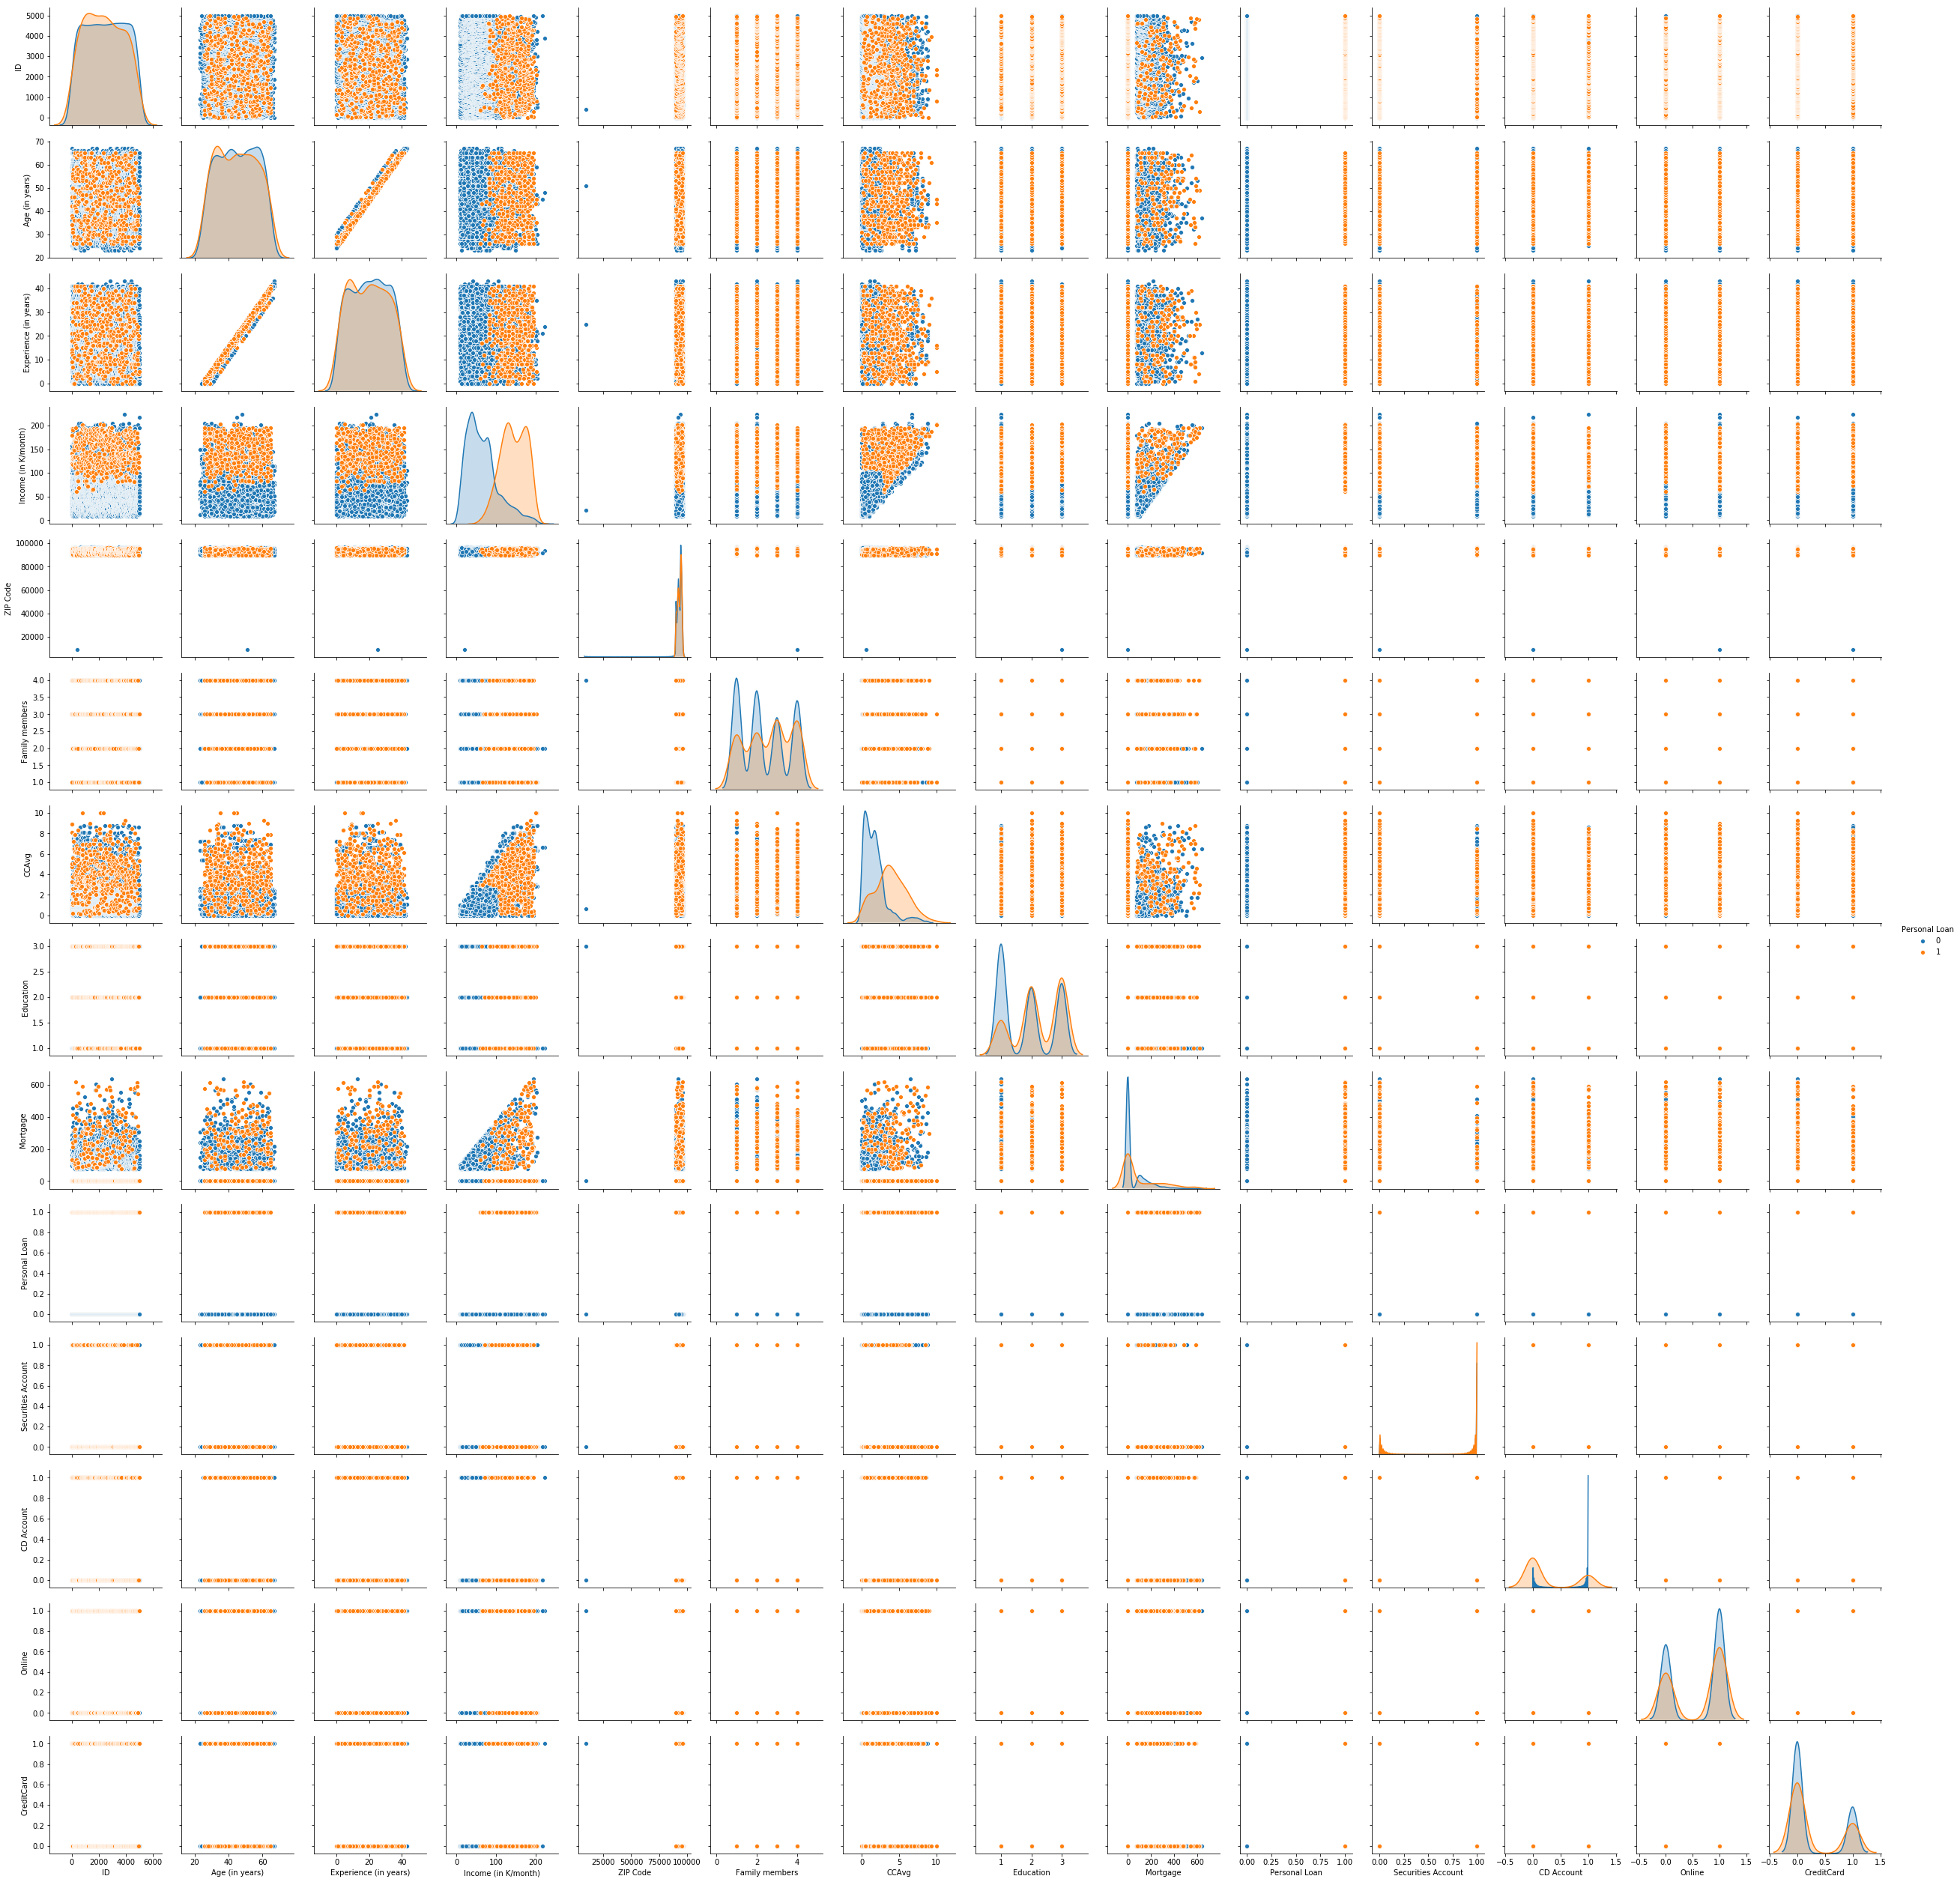

In [132]:
sns.pairplot(ds, hue="Personal Loan")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


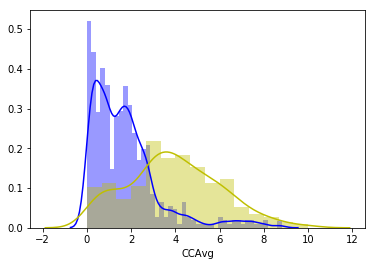

In [133]:
sns.distplot( ds[ds['Personal Loan'] == 0]['CCAvg'], color = 'b')
sns.distplot( ds[ds['Personal Loan'] == 1]['CCAvg'], color = 'y')

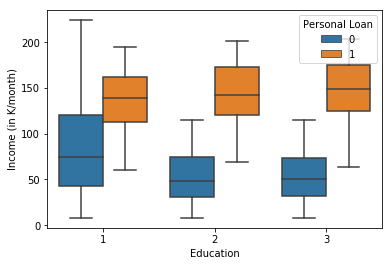

In [134]:
sns.boxplot(x="Education", y="Income (in K/month)", hue="Personal Loan", data=ds)

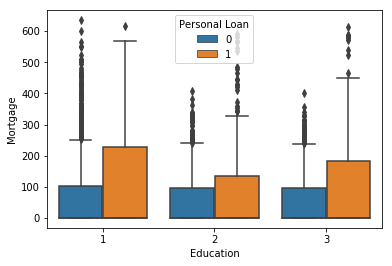

In [135]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=ds)

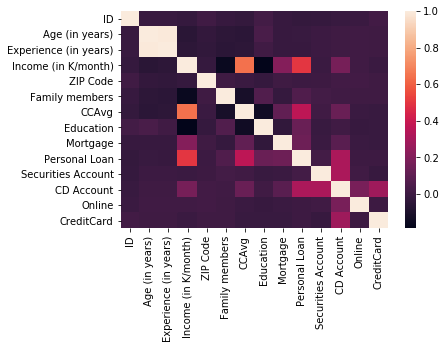

In [136]:
corr = ds.corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)

In [137]:
x=ds.drop(['Experience (in years)' ,'ID' ,'Personal Loan'],axis=1)
y=ds[["Personal Loan"]]

In [138]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 7)

In [139]:
x_train, x_test, y_train, y_test

(      Age (in years)  Income (in K/month)  ZIP Code  Family members  CCAvg  \
 717               59                   94     93940             3.0   0.50   
 2496              63                   32     93117             3.0   0.70   
 2469              43                   89     92780             1.0   0.10   
 1375              50                  179     92612             1.0   2.90   
 2742              39                   89     95762             2.0   0.40   
 359               32                   32     93106             1.0   1.90   
 4532              48                  133     90073             2.0   3.10   
 887               41                  118     94720             2.0   3.30   
 4727              41                   58     92009             4.0   2.67   
 841               57                  121     94542             1.0   4.30   
 3532              38                  141     94022             2.0   0.00   
 3321              41                  120     94521

# Answer 3

In [149]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [150]:
y_predictTest = logistic_model.predict(x_test)

# Answer 4

In [151]:
metrics.confusion_matrix(y_test, y_predictTest)

array([[1336,   26],
       [  96,   42]], dtype=int64)

In [152]:
 metrics.accuracy_score(y_test,y_predictTest)

0.9186666666666666

# Answer 5

In [153]:
def build_knn_Model(k):
    NNHModel = KNeighborsClassifier(n_neighbors= k)
    NNHModel.fit(x_train, y_train.values.ravel())
    return NNHModel

def calculate_accuracy_score(model):
    y_predictTrain=model.predict(x_train)
    y_predictTest=model.predict(x_test)
    testAccuracy=  metrics.accuracy_score(y_test,y_predictTest)
    cf= metrics.confusion_matrix(y_test, y_predictTest)
    return testAccuracy,cf

def build_and_calculate_accuracy_for_KNN(k):
    model1 = build_knn_Model(k)
    testAccuracy,cf = calculate_accuracy_score(model1)
    print("Test data accuracy with k = %d is %f" % (model1.n_neighbors,testAccuracy))
    print(cf)
   

In [154]:
build_and_calculate_accuracy_for_KNN(3)

Test data accuracy with k = 3 is 0.905333
[[1324   38]
 [ 104   34]]


In [155]:
build_and_calculate_accuracy_for_KNN(5)

Test data accuracy with k = 5 is 0.911333
[[1334   28]
 [ 105   33]]


In [156]:
build_and_calculate_accuracy_for_KNN(7)

Test data accuracy with k = 7 is 0.908000
[[1338   24]
 [ 114   24]]


In [158]:
build_and_calculate_accuracy_for_KNN(23)

Test data accuracy with k = 23 is 0.907333
[[1356    6]
 [ 133    5]]
